In [1]:
%matplotlib inline
import pandas as pd
import sys
import shutil
from alpenglow.experiments import ExternalModelExperiment
from alpenglow.evaluation import DcgScore
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../tutorial_data/data.csv', header=None, names=['time', 'user', 'item'])

exp = ExternalModelExperiment(
    period_length=60 * 60 * 24 * 7,
    in_name_base="batches/batch",
    mode="read",
)

In [3]:
res = exp.run(data)

running experiment...


In [4]:
res['dcg'] = DcgScore(res)

In [5]:
res['dcg'].mean()

0.010521825980099235

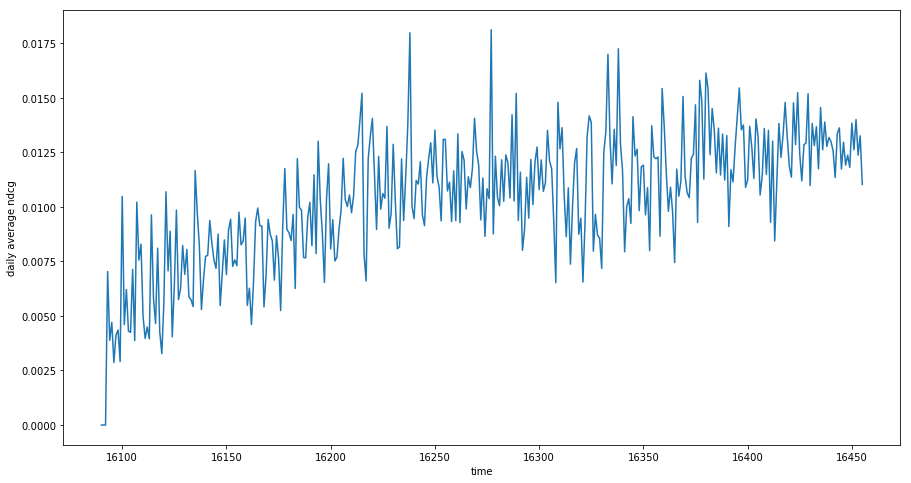

In [6]:
plt.figure(figsize=(15,8))
res.groupby(res.time//(60*60*24)).dcg.mean().plot()
plt.ylabel('daily average ndcg')